# Soal & Jawaban

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import mode

data_titanic = pd.read_csv('D:/File Tugas Kuliah/Titanic-Dataset.csv')

### 1. Eksplorasi Awal

a. Berapa jumlah total penumpang dalam data?

In [482]:
print("Jumlah total penumpang:", len(data_titanic))


Jumlah total penumpang: 891


b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik

Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


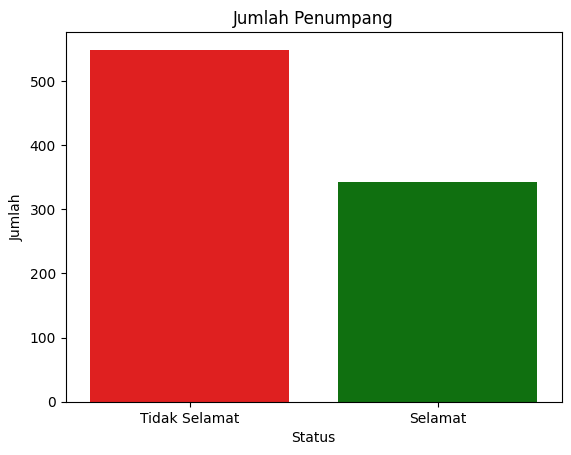

In [483]:
print(data_titanic['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'}))
sns.countplot(data=data_titanic, x='Survived', hue='Survived', palette={0: 'red', 1: 'green'},legend=False)
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title("Jumlah Penumpang")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()

c. Berapa rata - rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [484]:
print("Rata-rata umur penumpang:", data_titanic['Age'].mean())
print("Penumpang termuda:", data_titanic['Age'].min())
print("Penumpang tertua:", data_titanic['Age'].max())

Rata-rata umur penumpang: 29.69911764705882
Penumpang termuda: 0.42
Penumpang tertua: 80.0


d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan

Jumlah penumpang berdasarkan jenis kelamin: Sex
male      577
female    314
Name: count, dtype: int64
Jenis kelamin terbanyak: male


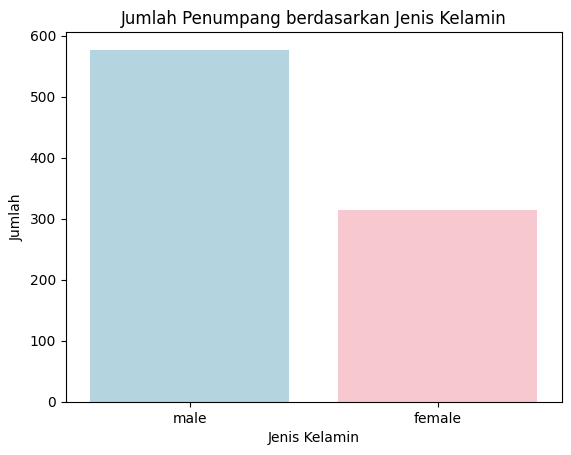

In [485]:
gender_counts = data_titanic['Sex'].value_counts()
print("Jumlah penumpang berdasarkan jenis kelamin:", gender_counts)
print("Jenis kelamin terbanyak:", gender_counts.idxmax())
sns.countplot(data=data_titanic, x='Sex', hue='Sex', palette={'male': 'lightblue', 'female': 'pink'}, legend=False)
plt.title("Jumlah Penumpang berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

Jumlah penumpang berdasarkan kelas: Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persentase kelas 1: 24.24%


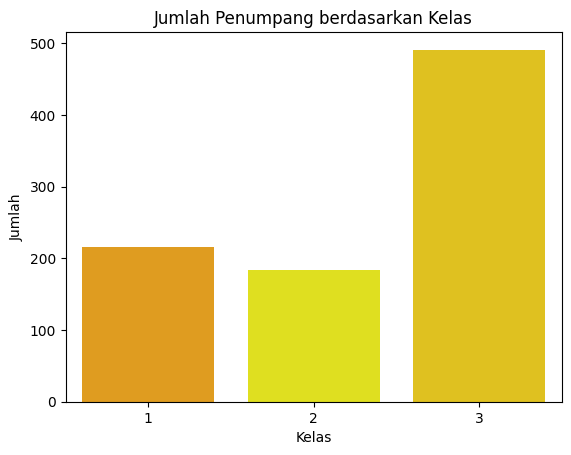

In [486]:
class_counts = data_titanic['Pclass'].value_counts()
print("Jumlah penumpang berdasarkan kelas:", class_counts)
percent_class1 = (class_counts[1] / len(data_titanic)) * 100
print("Persentase kelas 1: {:.2f}%".format(percent_class1))
sns.countplot(data=data_titanic, x='Pclass',hue='Pclass', palette={1: "orange", 2: "yellow", 3: "gold"},legend=False)
plt.title("Jumlah Penumpang berdasarkan Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

### Preprocessing

a. Apakah terdapat missing value pada data tersebut?

In [487]:
np.sum(data_titanic.isnull())

c:\Users\Fahsa MPN\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

b. Jika ya, apa yang anda lakukan?

In [488]:
data_titanic['Age']=data_titanic['Age'].fillna(data['Age'].mean())
data_titanic['Cabin'] = data_titanic['Cabin'].fillna('Unknown')
data_titanic['Embarked'].mode()
data_titanic['Embarked'] = data_titanic['Embarked'].fillna(data['Embarked'].mode()[0])
np.sum(data_titanic.isnull())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!

In [489]:
print(data_titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


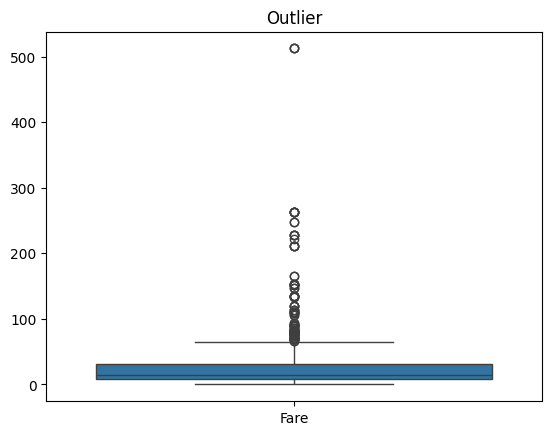

In [490]:
sns.boxplot(data=data_titanic[['Fare']])
plt.title("Outlier")
plt.show()

d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

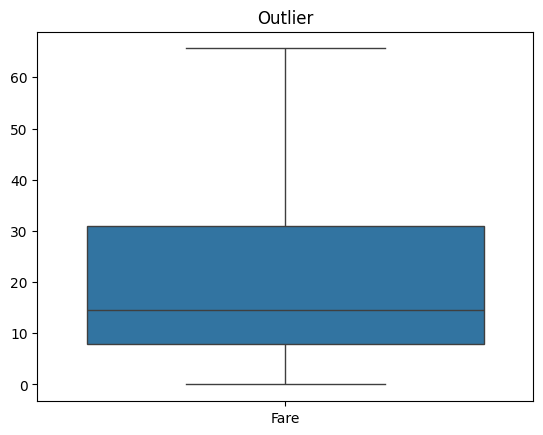

Untuk menghilangkan outliernya itu menggunakan Interquatile Range atau biasa disingkat dengan IQR


In [491]:
Q1 = data_titanic['Fare'].quantile(0.25)
Q3 = data_titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
data_titanic['Fare'] = np.where(data_titanic['Fare'] > upper_limit, upper_limit, data_titanic['Fare'])
sns.boxplot(data=data_titanic[['Fare']])
plt.title("Outlier")
plt.show()
print("Untuk menghilangkan outliernya itu menggunakan Interquatile Range atau biasa disingkat dengan IQR")

e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?

In [492]:
scaler = StandardScaler()
data_titanic[['Fare']] = scaler.fit_transform(data_titanic[['Fare']])


### Modelling

a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

In [493]:
X = data_titanic[['Pclass', 'Sex', 'Age', 'Fare']]
X = pd.get_dummies(X, drop_first=True) 
y = data_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Agar model tidak hanya bagus di data latih tapi juga bisa generalisasi.")

Agar model tidak hanya bagus di data latih tapi juga bisa generalisasi.


b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

In [494]:
print("80% training dan 20% testing. Proporsi tersebut dipilih untuk melatih model dan cukup kecil untuk menguji performa")

80% training dan 20% testing. Proporsi tersebut dipilih untuk melatih model dan cukup kecil untuk menguji performa


c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing - masing model dan cara kerjanya.

In [495]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\n Logistic Regression: model linier sederhana untuk klasifikasi.\n Decision Tree: model berbasis pohon keputusan.\n Random Forest: kumpulan pohon (ensemble) untuk hasil lebih stabil dan akurat.")


 Logistic Regression: model linier sederhana untuk klasifikasi.
 Decision Tree: model berbasis pohon keputusan.
 Random Forest: kumpulan pohon (ensemble) untuk hasil lebih stabil dan akurat.


d. Berapa nilai evaluasi dari masing masing model pada data uji? Apa arti dari masing - masing metrik evaluasi tersebut?

In [496]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("=== Model: Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("\n=== Model: Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n=== Model: Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("\n Accuracy: seberapa banyak prediksi benar secara total.\n Precision: seberapa banyak yang diprediksi selamat benar-benar selamat.\n Recall: dari semua yang benar-benar selamat, berapa banyak yang berhasil diprediksi.\n F1-score: gabungan dari precision dan recall.")

=== Model: Logistic Regression ===
Akurasi: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


=== Model: Decision Tree ===
Akurasi: 0.7486033519553073
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       105
           1       0.70      0.68      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179


=== Model: Random Forest ===
Akurasi: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

   

e. Bandingkan hasil dari ketiga algoritma tersebut,mana yang paling bagus? Berikan ulasan kira - kira apa yang menyebabkan metode tersebut dapat memprediksi penumpang yang selamat?

In [497]:
print("Menurut hasil diatas algoritma yang paling bagus yaitu logistic regression dikarenakan : \n 1. Model sederhana dan efisien,\n 2. Cocok untuk data yang tidak terlalu kompleks. \n 3. Sudah dapat prediksi akurat hanya dari fitur-fitur sederhana. \n 4. Tidak overfitting ke data latih, jadi lebih stabil di data uji")

Menurut hasil diatas algoritma yang paling bagus yaitu logistic regression dikarenakan : 
 1. Model sederhana dan efisien,
 2. Cocok untuk data yang tidak terlalu kompleks. 
 3. Sudah dapat prediksi akurat hanya dari fitur-fitur sederhana. 
 4. Tidak overfitting ke data latih, jadi lebih stabil di data uji


# Evaluasi

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang selamat?

In [498]:
report = classification_report(y_test, models['Logistic Regression'].predict(X_test), output_dict=True)
print("Precision untuk Selamat:", report['1']['precision'])
print("Recall untuk Selamat:", report['1']['recall'])


Precision untuk Selamat: 0.803030303030303
Recall untuk Selamat: 0.7162162162162162


b. Berapa banyak penumpang yang diprediksi selamat dan berapa di antaranya benar - benar selamat?

In [499]:
y_pred = models['Logistic Regression'].predict(X_test)
prediksi_selamat = sum(y_pred == 1)
selamat = sum((y_pred == 1) & (y_test == 1))
print("Jumlah diprediksi selamat:", prediksi_selamat)
print("Jumlah yang benar-benar selamat:", selamat)


Jumlah diprediksi selamat: 66
Jumlah yang benar-benar selamat: 53
